In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

frameworks = ['three','babylon','playcanvas','aframe','rtf','ar-three','ar-aframe','mindar-three','mindar-aframe']
cubeNums = [8,64,512,4096,32768]
textureNums =[0,1,2,4]
railNames = ['power.rails.aoc.logic',
            'power.rails.aoc.memory',
            'power.rails.cpu.big',
            'power.rails.cpu.little',
            'power.rails.cpu.mid',
            'power.rails.ddr.a',
            'power.rails.ddr.b',
            'power.rails.ddr.c',
            'power.rails.display',
            'power.rails.gpu',
            'power.rails.memory.interface',
            'power.rails.modem',
            'power.rails.radio.frontend',
            'power.rails.system.fabric',
            'power.rails.tpu',
            'power.rails.wifi.bt']

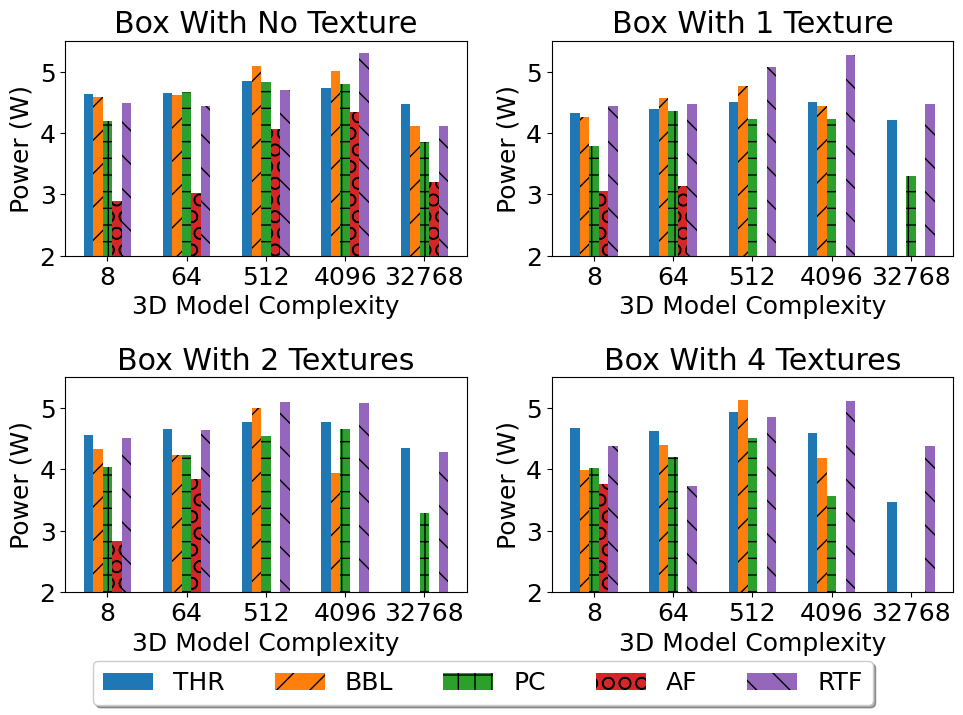

In [47]:
# renderingenergy.png
plt.rcParams.update({'font.size': 18})
df = pd.read_csv('./results/pixel-rendering-energy-withzero.csv')
boxTextured0=df[df['textureNum']==0]
boxTextured1=df[df['textureNum']==1]
boxTextured2=df[df['textureNum']==2]
boxTextured4=df[df['textureNum']==4]
def splitFrameworks(df,key):
    three=df[df['framework']=='three']
    babylon=df[df['framework']=='babylon']
    playcanvas=df[df['framework']=='playcanvas']
    aframe=df[df['framework']=='aframe']
    reactthreefiber=df[df['framework']=='rtf']
    return np.array(three[key]).astype(np.float64),np.array(babylon[key]).astype(np.float64),np.array(playcanvas[key]).astype(np.float64),np.array(aframe[key]).astype(np.float64),np.array(reactthreefiber[key]).astype(np.float64)
boxTextured0Datas=splitFrameworks(boxTextured0,'total')
boxTextured1Datas=splitFrameworks(boxTextured1,'total')
boxTextured2Datas=splitFrameworks(boxTextured2,'total')
boxTextured4Datas=splitFrameworks(boxTextured4,'total')

labels = ['8', '64', '512', '4096', '32768']
# ylabels=[1e1,1e2,1e3,1e4,1e5]
width = 0.12
x = np.arange(len(labels))  # the label locations
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2,figsize=(10,7))

# ax0.set_yscale('log')
ax0.set_ylim(2,5.5)
rects1 = ax0.bar(x - width*2, boxTextured0Datas[0], width,label='THR')
rects2 = ax0.bar(x - width, boxTextured0Datas[1], width,label='BBL',hatch='/')
rects3 = ax0.bar(x , boxTextured0Datas[2], width,label='PC',hatch='+')
rects4 = ax0.bar(x + width, boxTextured0Datas[3], width,label='AF',hatch='O')
rects5 = ax0.bar(x + width*2, boxTextured0Datas[4], width,label='RTF',hatch='\\')
ax0.set_xticks(x, labels)
ax0.set_ylabel('Power (W)')
ax0.set_title('Box With No Texture')
# ax0.set_yticks(ylabels)
ax0.set_xlabel('3D Model Complexity')


# ax1.set_yscale('log')
ax1.set_ylim(2,5.5)
rects1 = ax1.bar(x - width*2,boxTextured1Datas[0], width)
rects2 = ax1.bar(x - width, boxTextured1Datas[1], width,hatch='/')
rects3 = ax1.bar(x ,boxTextured1Datas[2], width,hatch='+')
rects4 = ax1.bar(x + width, boxTextured1Datas[3], width,hatch='O')
rects5 = ax1.bar(x + width*2, boxTextured1Datas[4], width,hatch='\\')
ax1.set_xticks(x, labels)
ax1.set_ylabel('Power (W)')
ax1.set_xlabel('3D Model Complexity')
ax1.set_title('Box With 1 Texture')
# ax1.set_yticks(ylabels)


# ax2.set_yscale('log')
ax2.set_ylim(2,5.5)
rects1 = ax2.bar(x - width*2, boxTextured2Datas[0], width)
rects2 = ax2.bar(x - width, boxTextured2Datas[1], width,hatch='/')
rects3 = ax2.bar(x , boxTextured2Datas[2], width,hatch='+')
rects4 = ax2.bar(x + width, boxTextured2Datas[3], width,hatch='O')
rects5 = ax2.bar(x + width*2, boxTextured2Datas[4], width,hatch='\\')
ax2.set_xticks(x, labels)
ax2.set_ylabel('Power (W)')
ax2.set_title('Box With 2 Textures')
# ax2.set_yticks(ylabels)
ax2.set_xlabel('3D Model Complexity')

# ax3.set_yscale('log')
ax3.set_ylim(2,5.5)
rects1 = ax3.bar(x - width*2, boxTextured4Datas[0], width)
rects2 = ax3.bar(x - width, boxTextured4Datas[1], width,hatch='/')
rects3 = ax3.bar(x ,boxTextured4Datas[2], width,hatch='+')
rects4 = ax3.bar(x + width, boxTextured4Datas[3], width,hatch='O')
rects5 = ax3.bar(x + width*2,boxTextured4Datas[4], width,hatch='\\')
ax3.set_xticks(x, labels)
ax3.set_title('Box With 4 Textures')
# ax3.set_yticks(ylabels)
ax3.set_xlabel('3D Model Complexity')
ax3.set_ylabel('Power (W)')

fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.tight_layout()

plt.savefig('./results/images/renderingenergy1.png')

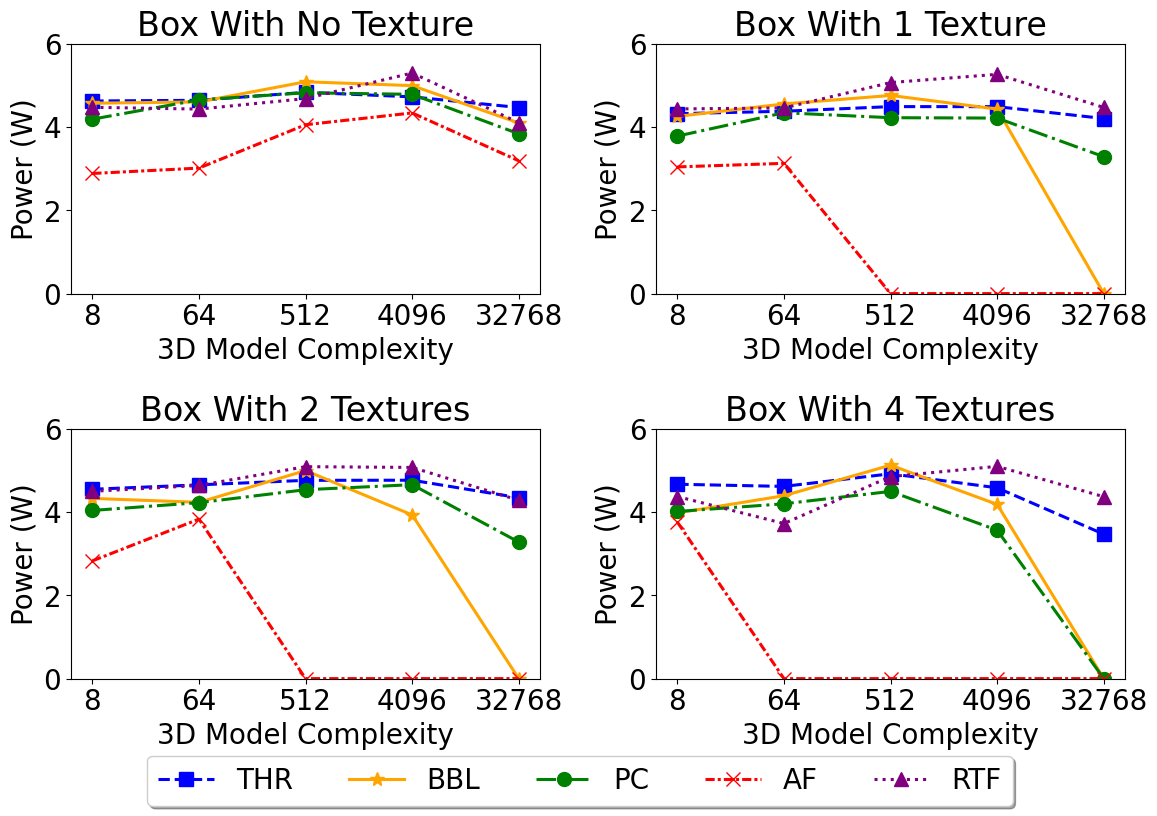

In [22]:

# renderingenergy.png
plt.rcParams.update({'font.size': 20})
df = pd.read_csv('./results/pixel-rendering-energy-withzero.csv')


fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(12,8))
def plotModel(df,ax,textureNum,first=False):
    df = df[df['textureNum']==textureNum]
    three=df[df['framework']=='three']
    babylon=df[df['framework']=='babylon']
    playcanvas=df[df['framework']=='playcanvas']
    aframe = df[df['framework']=='aframe']
    reactthreefiber=df[df['framework']=='rtf']
    def getFrameworkInfo(three):
        three8 = np.mean(three[three['cubeNum']==8]['total'].astype(np.float64))
        three64 = np.mean(three[three['cubeNum']==64]['total'].astype(np.float64))
        three512 = np.mean(three[three['cubeNum']==512]['total'].astype(np.float64))
        three4096 = np.mean(three[three['cubeNum']==4096]['total'].astype(np.float64))
        three32768 = np.mean(three[three['cubeNum']==32768]['total'].astype(np.float64))
        return [three8,three64,three512,three4096,three32768]
    threeinfo = getFrameworkInfo(three)
    babyloninfo = getFrameworkInfo(babylon)
    playcanvasinfo = getFrameworkInfo(playcanvas)
    aframeinfo = getFrameworkInfo(aframe)
    reactthreefiberinfo=getFrameworkInfo(reactthreefiber)
    labels=['8','64','512','4096','32768']
    if first:
        ax.plot(labels,threeinfo,color='blue',linestyle='dashed',label='THR',linewidth=2.2,marker='s',markersize=10)
        ax.plot(labels,babyloninfo,color='orange',label='BBL',linewidth=2.2,marker='*',markersize=10)
        ax.plot(labels,playcanvasinfo,color='green',linestyle='dashdot',label='PC',linewidth=2.2,marker='o',markersize=10)
        ax.plot(labels,aframeinfo,color='red',linestyle=(0, (3,1,1,1)),label='AF',linewidth=2.2,marker='x',markersize=10)
        ax.plot(labels,reactthreefiberinfo,color='purple',linestyle='dotted',label='RTF',linewidth=2.2,marker='^',markersize=10)
    else:
        ax.plot(labels,threeinfo,color='blue',linestyle='dashed',linewidth=2.2,marker='s',markersize=10)
        ax.plot(labels,babyloninfo,color='orange',linewidth=2.2,marker='*',markersize=10)
        ax.plot(labels,playcanvasinfo,color='green',linestyle='dashdot',linewidth=2.2,marker='o',markersize=10)
        ax.plot(labels,aframeinfo,color='red',linestyle=(0, (3,1,1,1)),linewidth=2.2,marker='x',markersize=10)
        ax.plot(labels,reactthreefiberinfo,color='purple',linestyle='dotted',linewidth=2.2,marker='^',markersize=10)

ax0.set_ylabel('Power (W)')
ax1.set_ylabel('Power (W)')
ax2.set_ylabel('Power (W)')
ax3.set_ylabel('Power (W)')
ax0.set_ylim(0,6)
ax1.set_ylim(0,6)
ax2.set_ylim(0,6)
ax3.set_ylim(0,6)
plotModel(df,ax0,0,True)
plotModel(df,ax1,1)
plotModel(df,ax2,2)
plotModel(df,ax3,4)
ax0.set_title('Box With No Texture')
ax1.set_title('Box With 1 Texture')
ax2.set_title('Box With 2 Textures')
ax3.set_title('Box With 4 Textures')
ax0.set_xlabel('3D Model Complexity')
ax1.set_xlabel('3D Model Complexity')
ax2.set_xlabel('3D Model Complexity')
ax3.set_xlabel('3D Model Complexity')
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.tight_layout()

{'cpu': 2.071165722464092, 'ddr': 0.3235546839697259, 'gpu': 0.0764515084640535, 'display': 0.1292139111453301, 'memoryInterface': 0.4423313377659418, 'others': 0.43197813598693835}


([<matplotlib.patches.Wedge at 0x1562419a0>,
 [Text(-0.32698062169379327, 1.0502779027651399, 'cpu'),
  Text(-0.6870660442006759, -0.8590344876117809, 'ddr'),
  Text(-0.3386709266769753, -1.0465667696921008, 'gpu'),
  Text(-0.1393439112541956, -1.0911385220934982, 'display'),
  Text(0.4179389994076819, -1.017510192958334, 'memoryInterface'),
  Text(1.017162903632469, -0.418783509075948, 'others')],
 [Text(-0.17835306637843268, 0.5728788560537126, '59.6%'),
  Text(-0.3747632968367322, -0.4685642659700623, '9.3%'),
  Text(-0.18472959636925923, -0.5708546016502368, '2.2%'),
  Text(-0.07600576977501576, -0.5951664665964534, '3.7%'),
  Text(0.22796672694964465, -0.5550055597954547, '12.7%'),
  Text(0.554816129254074, -0.2284273685868807, '12.4%')])

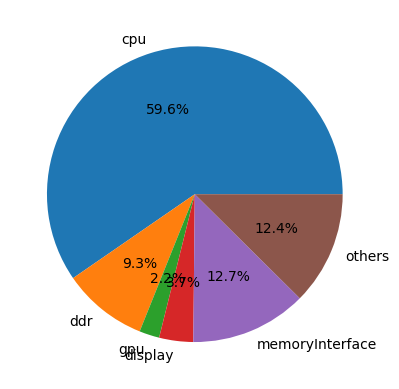

In [50]:
plt.rcParams.update({'font.size': 10})
df = pd.read_csv('./results/pixel-rendering-energy.csv')
framework = 'three'
cubeNum=32768
textureNum=0
df = df[df['framework']==framework]
df = df[df['cubeNum']==cubeNum]
df = df[df['textureNum']==textureNum]
# print(df.head())
total = df['total'].iloc[0]
cpuNames = [ 'power.rails.cpu.big',
            'power.rails.cpu.little',
            'power.rails.cpu.mid']
ddrNames = ['power.rails.ddr.a',
            'power.rails.ddr.b',
            'power.rails.ddr.c']
gpuNames = ['power.rails.gpu']
displayNames = ['power.rails.display']
memoryInterfaceNames = ['power.rails.memory.interface']
sizes = {
    'cpu':0,
    'ddr':0,
    'gpu':0,
    'display':0,
    'memoryInterface':0,
    'others':0
}
for railName in railNames:
    if railName in cpuNames:
        sizes['cpu'] += df[railName].iloc[0]
    elif railName in ddrNames:
        sizes['ddr'] += df[railName].iloc[0]
    elif railName in gpuNames:
        sizes['gpu'] += df[railName].iloc[0]
    elif railName in displayNames:
        sizes['display'] += df[railName].iloc[0]
    elif railName in memoryInterfaceNames:
        sizes['memoryInterface'] += df[railName].iloc[0]
    else:
        sizes['others'] += df[railName].iloc[0]
print(sizes)



plt.pie(sizes.values(), labels=sizes.keys(), autopct='%1.1f%%')
